In [0]:
# How to DESCRIBE Data and speak intelligently about a dataset:  
    # Week 1:  Setting up for writing code. 
    #   - Programming in R and Python environments 
    #   - Loading in data and summarizing it for insights

    # Week 2:  Building a predictive model
    #   - What is Regression?
    #   - Develop a model to predict the future of a time series 
    #   - Developing your first classification model

    # Week 3: Evaluating model performance
    #   - How to know what your model has learned
    #   - Deploy your model in a basic prediction app!

In [2]:
# Lets upload a data file
from google.colab import files
uploaded = files.upload()


Saving yahoo_close.csv to yahoo_close.csv


In [3]:
# Check what's in your virtual machine's file system now
ls

sample_data/  yahoo_close.csv


In [0]:
import pandas as pd
myData = pd.read_csv('yahoo_close.csv')


In [21]:
myData.head()

,year,month,week,monthweek,weekday,VIX.Close
0,2012,Jan,1,1,Tue,22.969999
1,2012,Jan,1,1,Wed,22.219999
2,2012,Jan,1,1,Thu,21.480000
3,2012,Jan,1,1,Fri,20.629999
4,2012,Jan,2,2,Mon,21.070000


In [22]:
myData.describe()

,year,week,monthweek,VIX.Close
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,2014.003180,26.292528,2.941971,15.736685
std,1.413647,14.958344,1.293384,3.480582
min,2012.000000,0.000000,1.000000,10.320000
25%,2013.000000,13.000000,2.000000,13.310000
50%,2014.000000,26.000000,3.000000,14.775000
75%,2015.000000,39.000000,4.000000,17.237500
max,2016.000000,53.000000,5.000000,40.740002


In [0]:
myDataSubset = myData.loc[:, ['week', 'weekday', 'VIX.Close']]

In [24]:
myDataSubset.head()

,week,weekday,VIX.Close
0,1,Tue,22.969999
1,1,Wed,22.219999
2,1,Thu,21.480000
3,1,Fri,20.629999
4,2,Mon,21.070000


In [0]:
import matplotlib.pyplot as plt

In [26]:
! pip install mpld3

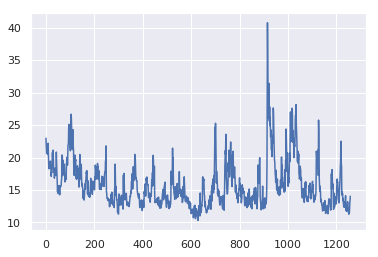

In [27]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

plt.plot(myDataSubset['VIX.Close'])

In [28]:
print(pd.crosstab(index=myData["weekday"],columns=myData["month"]))

month    Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
weekday                                                            
Fri       18   23   20   20   22   20   21   20   23   22   22   21
Mon       22   22   22   16   15   21   22   22   16   21   21   17
Thu       21   22   21   20   22   21   21   22   23   16   23   21
Tue       22   21   22   20   21   23   21   22   22   21   21   22
Wed       22   22   21   21   21   22   21   21   22   21   23   21


In [29]:
print(pd.unique(myDataSubset['weekday']))
print(pd.crosstab(index=myDataSubset["weekday"],columns="count"))

['Tue' 'Wed' 'Thu' 'Fri' 'Mon']
col_0    count
weekday       
Fri        252
Mon        237
Thu        253
Tue        258
Wed        258


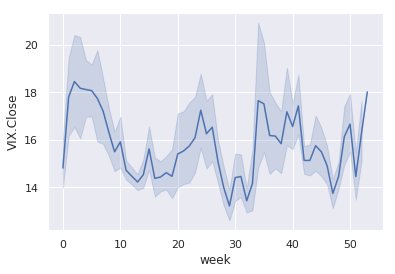

In [30]:
mpld3.disable_notebook()
import seaborn as sns; sns.set()
ax = sns.lineplot(x="week", y="VIX.Close", data=myDataSubset)

In [31]:
myDataSubset['VIX.Close'].min()

10.32

In [0]:
# Data Mutation
myDataSubset['VIX.Manipulated01'] = ( myDataSubset['VIX.Close'] - myDataSubset['VIX.Close'].min() ) / ( myDataSubset['VIX.Close'].max() - myDataSubset['VIX.Close'].min() )
myDataSubset.to_csv('myDataSubset.csv')

In [0]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

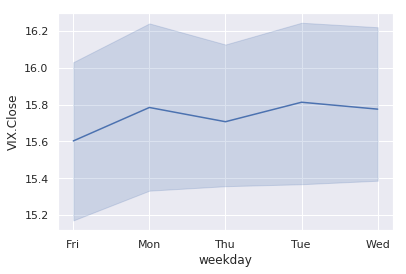

In [34]:
import seaborn as sns; sns.set()
ax = sns.lineplot(x="weekday", y="VIX.Close", data=myDataSubset)

In [0]:
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
weekday_dictionary ={'Mon' : 1, 'Tue' : 2, 'Wed' : 3, 'Thu' : 4, 'Fri' : 5} 
  
# Add a new column named 'Price' 
myDataSubset['weekday_no'] = myDataSubset['weekday'].apply(set_value, args =(weekday_dictionary, )) 

   week weekday  VIX.Close  VIX.Manipulated01  weekday_no
0     1     Tue  22.969999           0.415845           2
1     1     Wed  22.219999           0.391190           3
2     1     Thu  21.480000           0.366864           4
3     1     Fri  20.629999           0.338922           5
4     2     Mon  21.070000           0.353386           1
(1258, 5) observations


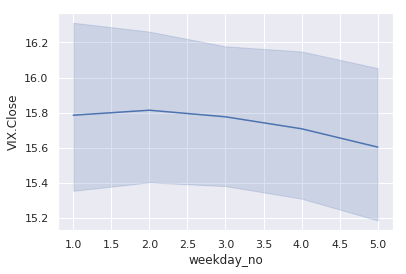

In [40]:
print(myDataSubset.head())

print('{} observations'.format(myDataSubset.shape))

import seaborn as sns; sns.set()
ax = sns.lineplot(x="weekday_no", y="VIX.Close", data=myDataSubset)

In [0]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['week', 'weekday_no']
X = myDataSubset[predictors]
y = myDataSubset['VIX.Close']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [42]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 16.517481885714037
betas = [-0.02334332 -0.05531416]


In [43]:
model.predict(X)

array([16.38351025, 16.3281961 , 16.27288194, ..., 15.13768667,
       15.08237251, 15.02705836])

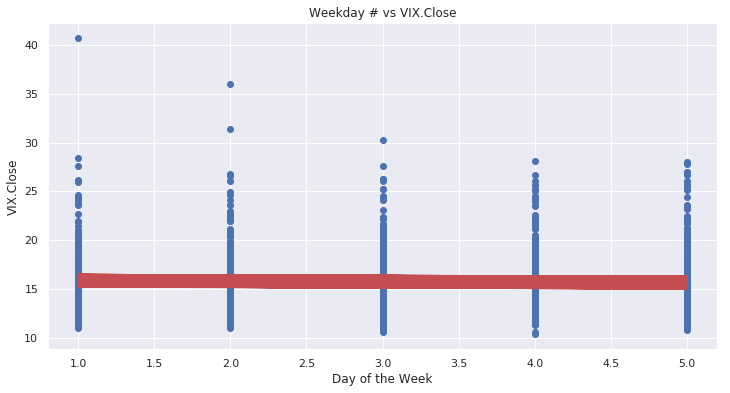

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

# Predict values
VIXprediction = model.predict(X)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(myDataSubset['weekday_no'], myDataSubset['VIX.Close'], 'o')           # scatter plot showing actual data
plt.plot(myDataSubset['weekday_no'], VIXprediction, 'r', linewidth=2)   # regression line
plt.xlabel('Day of the Week')
plt.ylabel('VIX.Close')
plt.title('Weekday # vs VIX.Close')

plt.show()

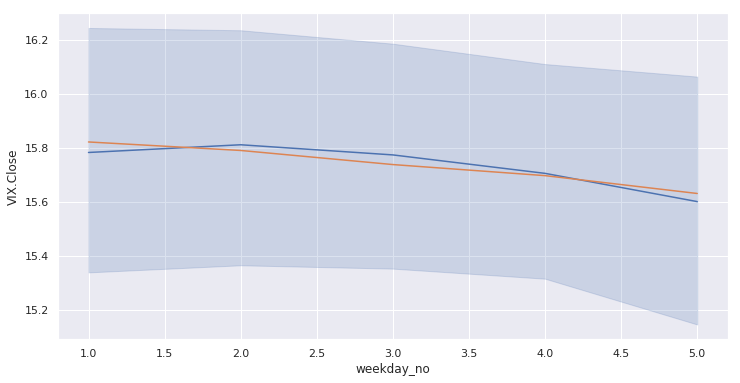

In [55]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))

import seaborn as sns; sns.set()

ax = sns.lineplot(x="weekday_no", y="VIX.Close", data=myDataSubset)
sns.lineplot(x=myDataSubset['weekday_no'], y=VIXprediction, ax=ax,err_style=None )

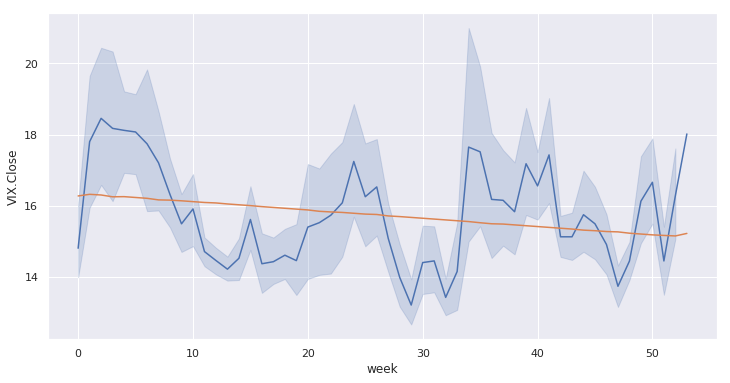

In [56]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))

import seaborn as sns; sns.set()

ax = sns.lineplot(x="week", y="VIX.Close", data=myDataSubset)
sns.lineplot(x=myDataSubset['week'], y=VIXprediction, ax=ax,err_style=None )

In [44]:
new_X = [[26, 2]]
print(model.predict(new_X))

[15.7999272]


In [0]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------